# Scatterplots

In [4]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [6]:
# read in csv
fuel_econ = pd.read_csv('fuel-econ.csv')
# confirm data
print(fuel_econ.shape)
fuel_econ.head()

(3929, 20)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


Text(0, 0.5, 'Combined Fuel Eff. (mpg)')

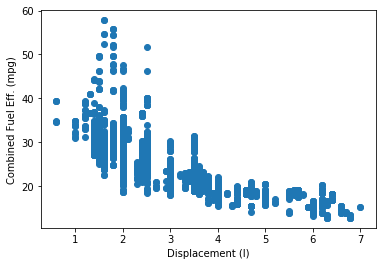

In [8]:
# scatter plot using matplotlib's scatter function
# plot of engine displacement and combined fuel efficiency
# engine displacement is essentially the volume of the pistons
plt.scatter(data = fuel_econ, x = 'displ', y = 'comb');
# x and y-axis labels
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

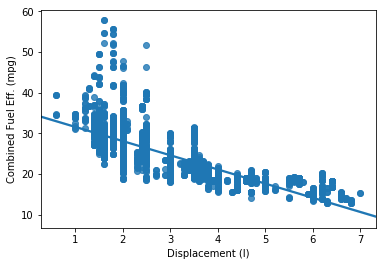

In [9]:
# alternate plot using seaborn's regplot function
# notice same arguments as the matplotlib scatter function
# by default includes regression line
sns.regplot(data = fuel_econ, x = 'displ', y = 'comb');
# matplotlib label's still work
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

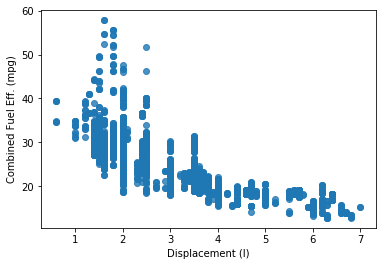

In [10]:
# same plot but set fit_reg to turn off the regression line
sns.regplot(data = fuel_econ, x = 'displ', y = 'comb', fit_reg = False);
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

> okay the following bit is some mess with log scaling a scatter plot, which kinda sorta worked?

In [24]:
# get min and max values for y-axis on log scale
np.log10(fuel_econ['comb'].describe())

count    3.594282
mean     1.394300
std      0.778386
min      1.107946
25%      1.315090
50%      1.380211
75%      1.450666
max      1.761796
Name: comb, dtype: float64

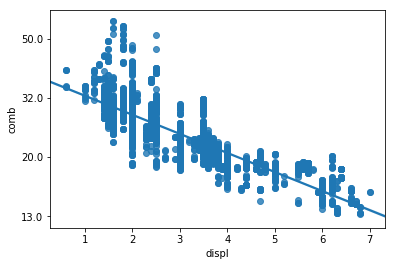

In [34]:
# honestly not sure what the inverse does exactly, but this is what converts the y-axis to a log scale
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

# log scale transformation of scatterplot with regression line
# also note that you can just list the x and y axis, don't necessarily need to list data, x, y 
sns.regplot(fuel_econ['displ'], fuel_econ['comb'].apply(log_trans));
# setting tick range 
tick_locs = 10 ** np.arange(1.1, 1.7 + 0.2, 0.2)
# then applying ticks to plot
plt.yticks(log_trans(tick_locs), (round(x) for x in tick_locs));

# Transparency and Jitter

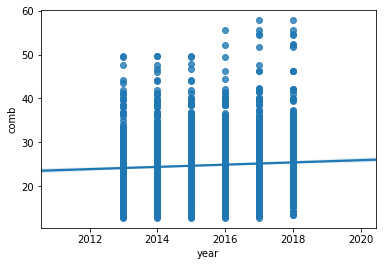

In [37]:
# scatter plot of model year and combined fuel efficiency 
# regression line shows slight upward curve, but not clear from plot
# need to use transparency and jitter to fix because year is discrete variable
sns.regplot(data = fuel_econ, x = 'year', y = 'comb');

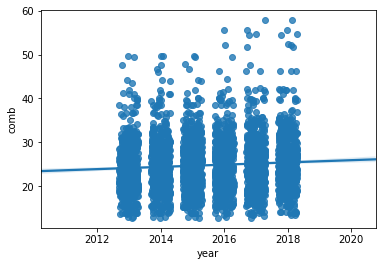

In [40]:
# plot with added jitter on x-axis
# note that x_jitter is only a valid argument for sns.regplot(), not plt.scatter()
# still not clear enough
sns.regplot(data = fuel_econ, x = 'year', y = 'comb', x_jitter = 0.3);

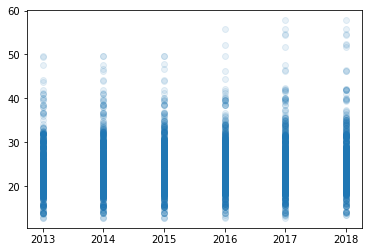

In [45]:
# scatter plot with transparency using plt.scatter (alpha goes between 0 and 1)
# getting jitter in matplotlib is complicated, so use seaborn
plt.scatter(data = fuel_econ, x = 'year', y = 'comb', alpha = 0.1);

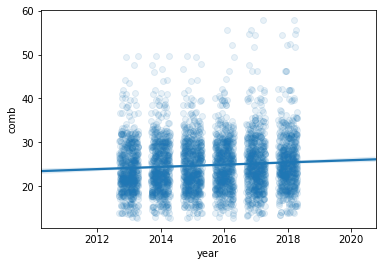

In [50]:
# scatter plot with jitter and transparency using sns.regplot
# note scatter_kws = {'alpha' : val} for transparency
sns.regplot(data = fuel_econ, x = 'year', y = 'comb', x_jitter = 0.3, scatter_kws = {'alpha' : 0.1} );

# Heat Maps

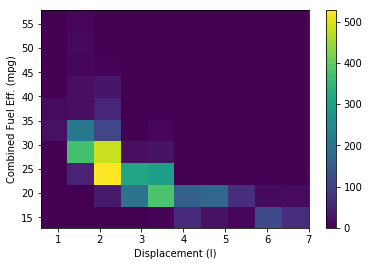

In [49]:
# heat map of displacement and combined fuel efficiency using plt.hist2d
# defaults 10x10 bins
# note the default color map is called 'viridis'
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb');
# added side color bar
plt.colorbar()
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

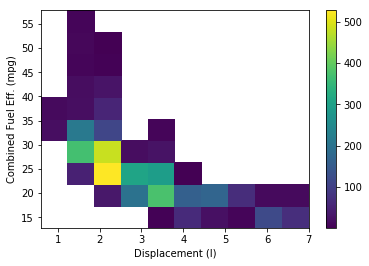

In [53]:
# any bin with value under cmin (so any bin with under 1) won't get counted
# but now have to change color scheme
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin = 0.5);
plt.colorbar()
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

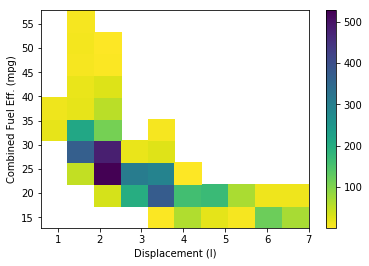

In [54]:
# cmap = 'viridis_r' sets the color map to the reverse of the default viridis
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin = 0.5, cmap = 'viridis_r');
plt.colorbar()
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

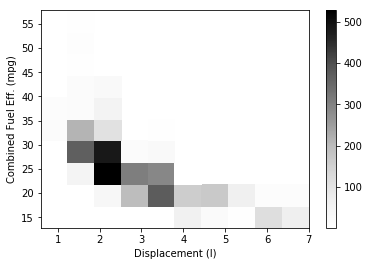

In [66]:
# to find more colormaps https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin = 0.5, cmap = 'Greys');
plt.colorbar()
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

In [67]:
# check displ and comb to find best bin sizes
fuel_econ[['displ', 'comb']].describe()

,displ,comb
count,3929.000000,3929.000000
mean,2.950573,24.791339
std,1.305901,6.003246
min,0.600000,12.821700
25%,2.000000,20.658100
50%,2.500000,24.000000
75%,3.600000,28.227100
max,7.000000,57.782400


In [81]:
# set bins for heatmap using np.arange
bins_x = np.arange(0.6, 7 + 0.3, 0.3)
bins_y = np.arange(12, 58 + 3, 3)

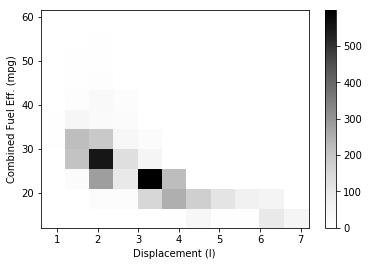

In [82]:
# heatmap  with discrete bins
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmap = 'Greys', bins = [bins_x, bins_y]);
plt.colorbar()
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

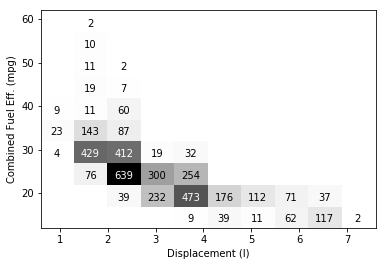

In [122]:
# larger bins for heat map with text annotations
bins_x = np.arange(0.6, 7 + 0.7, 0.7)
bins_y = np.arange(12, 58 + 5, 5)
#putting heatmap in object to get counts from
h2d = plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmap = 'Greys', bins = [bins_x, bins_y])
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');
# counts is array of values in h2d
counts = h2d[0]

# loop through cell counts and add text annotations for each
# need to mess with +/- values to get values centered
# then also change the 'if c >/<' value for what is most legible
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 400: # increase visibility on darkest cells
            plt.text(bins_x[i]+.33, bins_y[j]+2, int(c),
                     ha = 'center', va = 'center', color = 'white')
        elif c > 0: # of course don't want to include zeros
            plt.text(bins_x[i]+.33, bins_y[j]+2, int(c),
                    ha = 'center', va = 'center', color = 'black')

# Violin Plots